## Preprocessing

In [67]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math
%matplotlib inline

In [68]:
df=pd.read_csv("AW_AveMonthSpend.csv")
df1=pd.read_csv("AdvWorksCusts.csv")
df2=pd.read_csv("AW_BikeBuyer.csv")



In [69]:
df.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [70]:
df["AveMonthSpend"].min()

22

In [71]:
len(df['CustomerID'].unique())

16404

In [72]:
def keep_unique(df):
    lis=[]
    for x in df["CustomerID"]:
        if x in lis:
            df.drop(axis=0, inplace=True, labels=df[df["CustomerID"]==x].index[0])
        else:
            lis.append(x)

keep_unique(df)
len(df['CustomerID'])   

16404

In [73]:
df.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [74]:
keep_unique(df1)

In [75]:
keep_unique(df2)
df2["BikeBuyer"].sum()

5455

In [76]:
def cat_median():
    a=df1.loc[:,["YearlyIncome", "Occupation"]]
    b=a["Occupation"].unique()
    lis=[]
    for x in b:
        temp_df=a[a["Occupation"]==x]
        lis.append(x)
        lis.append(temp_df.median())
    return lis
print(cat_median())


['Professional', YearlyIncome    99058.0
dtype: float64, 'Management', YearlyIncome    118781.0
dtype: float64, 'Skilled Manual', YearlyIncome    66471.5
dtype: float64, 'Clerical', YearlyIncome    49481.0
dtype: float64, 'Manual', YearlyIncome    21722.0
dtype: float64]


In [77]:
df=pd.merge(df,df1, how='outer', left_on='CustomerID', right_on='CustomerID') 

In [78]:
for x in range (len(df["BirthDate"])):
    df["BirthDate"][x]= np.int64(str((pd.Timestamp('9/1/2016')-pd.Timestamp(df["BirthDate"][x]))/366).split()[0])
df["Age"]= df["BirthDate"]

C:\Users\prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
type(np.int64(str(df["BirthDate"][0]).split()[0]))

numpy.int64

In [80]:
temp=df[df["MaritalStatus"]=="M"]["AveMonthSpend"].median()
temp2=df[df["MaritalStatus"]=="S"]["AveMonthSpend"].median()
print(temp,temp2)

74.0 62.0


In [81]:
temp=df[df["NumberCarsOwned"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberCarsOwned"]>=3]["AveMonthSpend"].median()
print(temp,temp2)

65.0 96.0


In [82]:
temp=df[df["Gender"]=="M"]["AveMonthSpend"].describe()
temp2=df[df["Gender"]=="F"]["AveMonthSpend"].describe()
print(temp,temp2)

count    8290.000000
mean       87.826659
std        26.947794
min        29.000000
25%        70.000000
50%        79.000000
75%        96.000000
max       176.000000
Name: AveMonthSpend, dtype: float64 count    8114.000000
mean       56.620532
std        16.413050
min        22.000000
25%        46.000000
50%        52.000000
75%        61.000000
max       114.000000
Name: AveMonthSpend, dtype: float64


In [83]:
temp=df[df["NumberChildrenAtHome"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberChildrenAtHome"]>=1]["AveMonthSpend"].median()
print(temp,temp2)

57.0 88.0


In [84]:
df=pd.merge(df,df2, how='outer', left_on='CustomerID', right_on='CustomerID')

In [85]:
temp=df[df["BikeBuyer"]==0]["YearlyIncome"].median()
temp2=df[df["BikeBuyer"]==1]["YearlyIncome"].median()
print(temp,temp2)

65957.0 96084.0


In [86]:
temp=df[df["BikeBuyer"]==0]["NumberCarsOwned"].median()
temp2=df[df["BikeBuyer"]==1]["NumberCarsOwned"].median()
print(temp,temp2)

1.0 2.0


In [87]:
temp=df[df["BikeBuyer"]==1]["MaritalStatus"].value_counts()
temp

S    3256
M    2199
Name: MaritalStatus, dtype: int64

In [88]:
df

,CustomerID,AveMonthSpend,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,50,Bachelors,Professional,M,M,1,0,0,2,137947,50,0
1,11001,117,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,51,Bachelors,Professional,M,S,0,1,3,3,101141,51,1
2,11002,123,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,50,Bachelors,Professional,M,M,1,1,3,3,91945,50,0
3,11003,50,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,48,Bachelors,Professional,F,S,0,1,0,0,86688,48,0
4,11004,95,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,47,Bachelors,Professional,F,S,1,4,5,5,92771,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,51,Bachelors,Professional,F,M,1,4,5,5,101542,51,0
16400,26100,46,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,80,Partial College,Professional,F,S,1,2,0,3,46549,80,0
16401,11328,79,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,Canada,V2L3W8,636-555-0197,76,Bachelors,Management,M,M,1,2,0,5,133053,76,0
16402,23077,65,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,69,High School,Skilled Manual,M,M,1,2,0,4,31930,69,0


In [89]:
df.isna().sum()

CustomerID                  0
AveMonthSpend               0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
Age                         0
BikeBuyer                   0
dtype: int64

In [90]:
df=df.dropna(axis=1, how='any')
df

,CustomerID,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,50,Bachelors,Professional,M,M,1,0,0,2,137947,50,0
1,11001,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,51,Bachelors,Professional,M,S,0,1,3,3,101141,51,1
2,11002,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,50,Bachelors,Professional,M,M,1,1,3,3,91945,50,0
3,11003,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,48,Bachelors,Professional,F,S,0,1,0,0,86688,48,0
4,11004,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,47,Bachelors,Professional,F,S,1,4,5,5,92771,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,Latasha,Jimenez,7259 Birchwood,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,51,Bachelors,Professional,F,M,1,4,5,5,101542,51,0
16400,26100,46,James,Ptaszynski,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,80,Partial College,Professional,F,S,1,2,0,3,46549,80,0
16401,11328,79,Julian,Griffin,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,636-555-0197,76,Bachelors,Management,M,M,1,2,0,5,133053,76,0
16402,23077,65,Marvin,Hernandez,1019 Book Road,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,69,High School,Skilled Manual,M,M,1,2,0,4,31930,69,0


## Feature Selection

In [91]:
pd.set_option('display.max_columns', None)
dfcat_cols=["CountryRegionName","Education","Occupation","Gender","MaritalStatus","HomeOwnerFlag"]
num_cols=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]

In [92]:
print([df[x].dtype for x in num_cols])
print([df[x].dtype for x in cat_cols])

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('O')]
[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')]


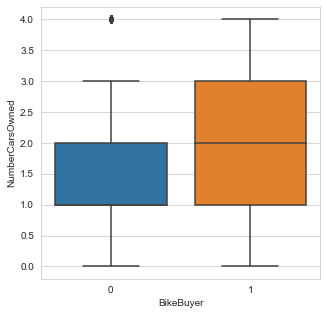

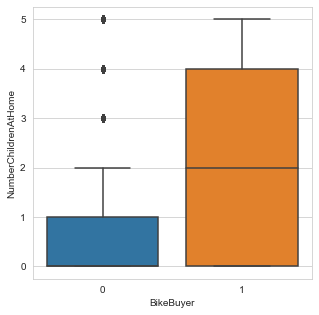

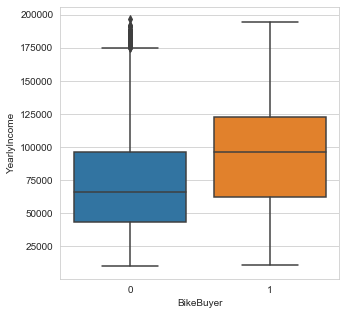

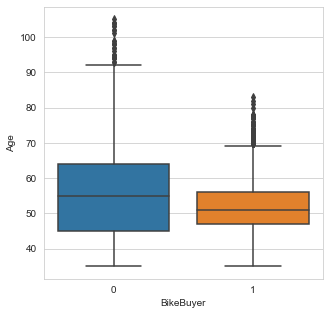

In [134]:
def plot_violin(credit, cols, col_x = 'BikeBuyer'):
    for col in cols:
        fig= plt.figure(figsize=(5,5))
        sns.set_style("whitegrid")
        fig=sns.boxplot(col_x,col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

ef 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16399    1.0
16400    1.0
16401    1.0
16402    1.0
16403    1.0
Name: dummy, Length: 16404, dtype: float64
CountryRegionName


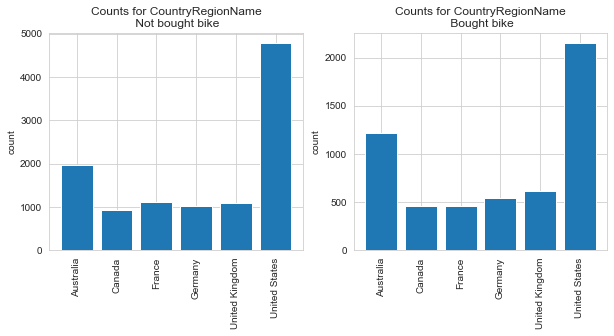

Education


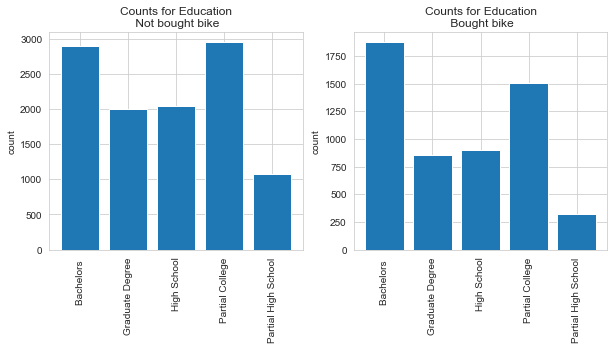

Occupation


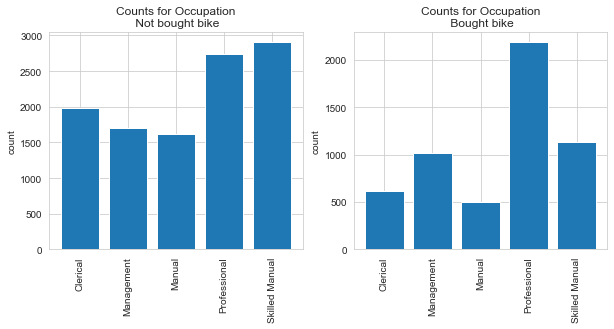

Gender


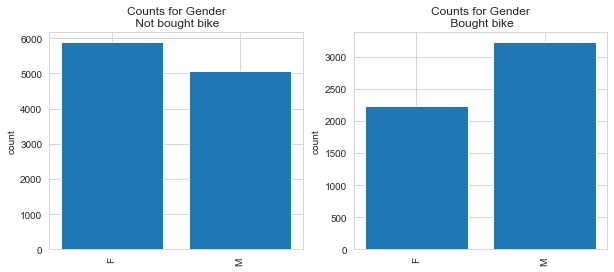

MaritalStatus


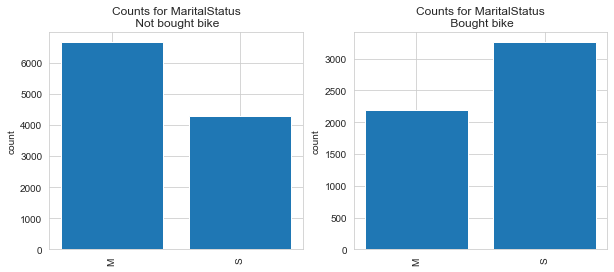

HomeOwnerFlag


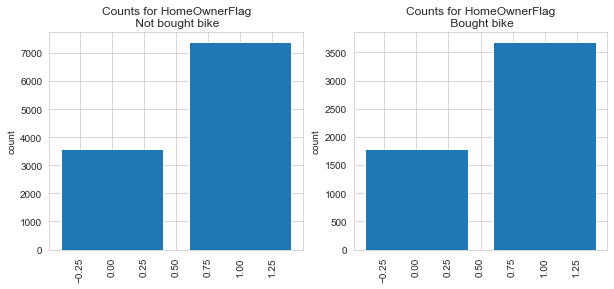

In [94]:
dummydf=df.copy()
dummydf['dummy'] = np.ones(shape = dummydf.shape[0])
print('ef',dummydf['dummy'])
for col in cat_cols:
    print(col)
    counts = dummydf[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not bought bike')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bought bike')
    plt.ylabel('count')
    plt.show()

In [95]:
usenum_col=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]
usecat_col=["Occupation","Gender","MaritalStatus"]

## Model Selection

Start by logistic regression. 
Check class imbalances

In [116]:
df["BikeBuyer"].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

Encoding categorical var

In [117]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ["Gender","MaritalStatus"]

Features = encode_string(df["Occupation"])
for col in categorical_columns:
    temp = encode_string(df[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(16404, 9)
[[0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1.]]


In [118]:
Features = np.concatenate([Features, np.array(df[["NumberCarsOwned","NumberChildrenAtHome",
                                                  "YearlyIncome","Age"]])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(16404, 13)
[[0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0 0 137947 50]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1 3 101141 51]]


divide data into training and test

In [119]:
labels = np.array(df['BikeBuyer'])

In [120]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3280)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [126]:
np.shape(X_test)

(3280, 13)

Normalise numerical data

In [101]:
scaler = preprocessing.StandardScaler().fit(X_train[:,9:])
X_train[:,9:] = scaler.transform(X_train[:,9:])
X_test[:,9:] = scaler.transform(X_test[:,9:])
X_train[:2,]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.4392543216157885,
        -0.65154727336091, 0.04368090752480528, 0.6185231655186291],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.3184328662071578,
        0.009111493199283402, 1.9970039239760968, -0.3606361807791282]],
      dtype=object)

fitting in logistic regression on 80% data as test set

In [102]:
logistic_mod = linear_model.LogisticRegression(max_iter=300) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.93487368]
[[-0.03135039 -0.32843476  0.02458427  0.20059925  0.13492521 -0.32410641
   0.32442999 -0.73606402  0.73638759 -0.16843639  1.17022755  0.58365784
  -0.39905965]]


Steps from here to be applied on new data after converting it into features

In [104]:
prob = logistic_mod.predict_proba(X_test)
print(prob[:10,:])

[[0.72669971 0.27330029]
 [0.56074826 0.43925174]
 [0.59885901 0.40114099]
 [0.76831269 0.23168731]
 [0.87825305 0.12174695]
 [0.96268993 0.03731007]
 [0.92570091 0.07429909]
 [0.92947532 0.07052468]
 [0.94090846 0.05909154]
 [0.78101114 0.21898886]]


evaluation

In [105]:
def score_model(prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:,1]])
scores = score_model(prob, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


In [106]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


In [107]:
print_metrics(y_test, scores)     

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1948               252
Actual negative       475               605

Accuracy  0.78
 
           Positive      Negative
Num case     2200          1080
Precision    0.80          0.71
Recall       0.89          0.56
F1           0.84          0.62


In [108]:
def score_model(prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:,1]])
scores = score_model(prob, 0.47)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


In [109]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [110]:
print_metrics(y_test, scores)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1920               280
Actual negative       449               631

Accuracy  0.78
 
           Positive      Negative
Num case     2200          1080
Precision    0.81          0.69
Recall       0.87          0.58
F1           0.84          0.63


## Working with question's dataset

In [127]:
dft=pd.read_csv("AW_test.csv")
dft.columns

dft=dft.dropna(axis=1, how='any')
dft.head()

def keep_unique(df):
    lis=[]
    for x in df["CustomerID"]:
        if x in lis:
            df.drop(axis=0, inplace=True, labels=df[df["CustomerID"]==x].index[0])
        else:
            lis.append(x)

keep_unique(dft)
len(dft['CustomerID'])   

for x in range (len(dft["BirthDate"])):
    dft["BirthDate"][x]= np.int64(str((pd.Timestamp('9/1/2016')-pd.Timestamp(dft["BirthDate"][x]))/366).split()[0])
dft["Age"]= dft["BirthDate"]

pd.set_option('display.max_columns', None)
dft=dft.dropna(axis=1, how='any')
dft.head()

usenum_col=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]
usecat_col=["Occupation","Gender","MaritalStatus"]

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ["Gender","MaritalStatus"]

Features = encode_string(dft["Occupation"])
for col in categorical_columns:
    temp = encode_string(dft[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])   

Features = np.concatenate([Features, np.array(dft[["NumberCarsOwned","NumberChildrenAtHome",
                                                  "YearlyIncome","Age"]])], axis = 1)
print(Features.shape)
print(Features[:2, :])   



C:\Users\prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(500, 9)
[[0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0.]]
(500, 13)
[[0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 2 0 86931 71]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 2 2 100125 51]]


In [130]:
X_test = Features
X_test[:5]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2, 0, 86931, 71],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2, 2, 100125, 51],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2, 0, 103985, 82],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0, 0, 127161, 57],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1, 2, 21876, 51]],
      dtype=object)

In [131]:
X_test[:,9:] = scaler.transform(X_test[:,9:])

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.4392543216157885,
        -0.65154727336091, 0.2234317769247784, 1.5086680257893175],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.4392543216157885,
        0.6697702597594768, 0.5558726194904141, -0.27162169475205933],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.4392543216157885,
        -0.65154727336091, 0.6531305891965952, 2.4878273720870747],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, -1.31910276756695,
        -0.65154727336091, 1.2370815492770237, 0.26246522141035367],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        -0.43992422297558076, 0.6697702597594768, -1.4157177617372976,
        -0.27162169475205933]], dtype=object)

In [133]:
prob = logistic_mod.predict_proba(X_test)
print(prob[:50,:])

[[0.89651729 0.10348271]
 [0.51723133 0.48276867]
 [0.97750061 0.02249939]
 [0.75668002 0.24331998]
 [0.86181872 0.13818128]
 [0.96607487 0.03392513]
 [0.26149301 0.73850699]
 [0.20029034 0.79970966]
 [0.14812044 0.85187956]
 [0.85995407 0.14004593]
 [0.54469174 0.45530826]
 [0.94520049 0.05479951]
 [0.93343888 0.06656112]
 [0.96584547 0.03415453]
 [0.73883696 0.26116304]
 [0.88411825 0.11588175]
 [0.78543363 0.21456637]
 [0.66239086 0.33760914]
 [0.03196898 0.96803102]
 [0.5723074  0.4276926 ]
 [0.9207926  0.0792074 ]
 [0.87266973 0.12733027]
 [0.04700203 0.95299797]
 [0.75123688 0.24876312]
 [0.86373693 0.13626307]
 [0.77435171 0.22564829]
 [0.74834756 0.25165244]
 [0.07022488 0.92977512]
 [0.4956136  0.5043864 ]
 [0.88040655 0.11959345]
 [0.31048304 0.68951696]
 [0.49474794 0.50525206]
 [0.98627114 0.01372886]
 [0.80788047 0.19211953]
 [0.30236611 0.69763389]
 [0.10511    0.89489   ]
 [0.05948132 0.94051868]
 [0.6106338  0.3893662 ]
 [0.84213524 0.15786476]
 [0.74867    0.25133   ]


use score model fnc, append array on AW test

make csv file of new df
from xls file check if customer id of new df is in order. If not write simple n^2 for loop
paste answer column from new csv file to xls. You will get accuracy
keep changing model and running this, get max accuracy, enjoy